<h1> ATTENTION : IMPORTANT</h1>
<b>
N'oublier pas de changer le fichier Cluster_Ensembles et de uploader le fichier source 
dans le repertoire /home sous le nom de DBLP_new_version.txt
</b> 

In [ ]:
pip install Cluster_Ensembles


In [ ]:
import pandas as pd
import numpy as np
import ast  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk 
import matplotlib.pyplot as plt
import community
import networkx as nx
import Cluster_Ensembles as CE 
from random import choice
nltk.download('stopwords')
nltk.download('wordnet')
!sudo apt-get install metis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Reading package lists... Done
Building dependency tree       
Reading state information... Done
metis is already the newest version (5.1.0.dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
def  extract():
    #Make the structure of the dataframe:
    row = {'Title':[], 'Authers':[] , 'Year':[], 'Venue':[],'id':[],'ListCitations':[],'Abstract':[]}

    columns = ['Title','Authers','Year','Venue','id','ListCitations','Abstract']

    #Open the file DBLP_Subset.txt in the reading mode
    f = open("/home/DBLP_new_version.txt", "r")
    #Transform the lines of the file into a list:
    Lines = f.readlines()
    row['Title'] = Lines[0][2:len(Lines[0])-1].strip()
    data = []
    turn = 1
    i=1
    print(len(Lines))
    while (i < len(Lines)):
        line = Lines[i].strip()
        
        if(line.startswith("#*")):
            while(turn % 7 != 0):
                row[columns[turn]]=None
                turn+=1
            if (row['Venue'] == 'SIGMOD Conference') or (row['Venue'] == 'STOC') or (row['Venue'] == 'SIGIR'):
                data.append(row)
            row = {'Title':'', 'Authers':[] , 'Year':'', 'Venue':'','id':'','ListCitations':[],'Abstract':''}
            line = line[2:].strip()
            while (i<len(Lines) -1 and not Lines[i+1].startswith(('#@','#*','#t','#c','#id','#%','#!'))):
                i +=1
                line = line + " "+ Lines[i].strip()
            row['Title']= line
            i +=1
            turn = 1


        elif(line.startswith("#@")):
            while(turn % 7 != 1):
                row[columns[turn]]=None
                turn+=1

            line = line[2:].strip()
            row['Authers'] = line.split(',')
            while (i<len(Lines) -1 and not Lines[i+1].startswith(('#@','#*','#t','#c','#id','#%','#!'))):
                i +=1
                row['Authers'].append(Lines[i].strip())
            i +=1
            turn = 2
        
        elif(line.startswith("#t")):
            while(turn % 7 != 2):
                row[columns[turn]]=None
                turn+=1
            
            line = line[2:].strip()
            row['Year']= line
            i+=1
            turn = 3

        elif(line.startswith("#c")):
            while(turn % 7 != 3):
                row[columns[turn]]=None
                turn+=1
            line = line[2:].strip()
            row['Venue']= line
            i+=1
            turn = 4

        elif(line.startswith("#index")):
            while(turn % 7 != 4):
                row[columns[turn]]=None
                turn+=1
            
            line = line[6:].strip()
            row['id'] = line
            i +=1
            turn = 5

        elif(line.startswith("#%")):
            while(turn % 7 != 5):
                row[columns[turn]]=None
                turn+=1
            
            line = line[2:len(line)-1]
            row['ListCitations'].append(line)
            while (i<len(Lines)-1 and Lines[i+1].startswith('#%')):
                i +=1
                row['ListCitations'].append(Lines[i][2:].strip())
            i+=1
            turn = 6
        
        elif(line.startswith("#!")):
            while(turn % 7 != 6):
                row[columns[turn]]=None
                turn+=1
            
            line = line[2:].strip()
            while (i<len(Lines)-1 and not Lines[i+1].startswith(('#@','#*','#t','#c','#id','#%','#!'))):
                i +=1
                line = line + " "+ Lines[i].strip()
            row['Abstract'] = line
            i +=1
            turn = 0
        else:
            if(line.strip() == ''):
                i+=1
            else:
                print(Lines[i])

    while(turn % 7 != 0):
                row[columns[turn]]=None
                turn+=1

    data.append(row)

 #Create the dataframe from the data:
    df = pd.DataFrame(data)
    return df
        






In [ ]:
#The extraction of the data from the file
df = extract()
df.info()

697152
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6580 entries, 0 to 6579
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          6580 non-null   object
 1   Authers        6580 non-null   object
 2   Year           6580 non-null   object
 3   Venue          6580 non-null   object
 4   id             6580 non-null   object
 5   ListCitations  5305 non-null   object
 6   Abstract       4383 non-null   object
dtypes: object(7)
memory usage: 360.0+ KB


In [ ]:
#The None rows for ListCitations will be replaced by ann empty list
df.ListCitations= df.ListCitations.apply(lambda x : [] if x == None else x )

#Create the new feature : NbrCitations that represente the number of citations:
df['NbrCitations']=df['ListCitations'].apply(lambda x : len(x))

#Create the new feature NbrAuthors that represente the number of authors:
df['NbrAuthers']=df['Authers'].apply(lambda x : len(x))

#Drop all the row that contain Nan Values:
df.dropna(inplace = True)

#Showing the information of the data after the modification:
print(df.info())

columns = ['Title','Authers','Year','Venue','id','ListCitations','Abstract','NbrAuthers','NbrCitations']
df = df.reset_index()


#Showing the first rows of every feature
for elm in columns:
  print(df[elm].head())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 6579
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          4383 non-null   object
 1   Authers        4383 non-null   object
 2   Year           4383 non-null   object
 3   Venue          4383 non-null   object
 4   id             4383 non-null   object
 5   ListCitations  4383 non-null   object
 6   Abstract       4383 non-null   object
 7   NbrCitations   4383 non-null   int64 
 8   NbrAuthers     4383 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 342.4+ KB
None
0    Formal models for expert finding in enterprise...
1    Latent Semantic Indexing is an Optimal Special...
2    Latent semantic-space: iterative scaling impro...
3    Planning in an Expert System for Automated Inf...
4    Discovering and structuring information flow a...
Name: Title, dtype: object
0    [Krisztian Balog, Leif Azzopardi, Maarten de R...
1    [B

In [ ]:
#### The preparation for the NLP traitement: 

# Get the stop words:
stop_words = stopwords.words('english') 

#initialize the tokenizer and the lemmatizer: 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer() 

In [ ]:
### Apply the traitement to the Abstract feature:

#Remove the stopwords,the numerical strings and the characteres and Applaying the limmetization to the result:
df['Abstract']= df['Abstract'].apply(lambda x: [lemmatizer.lemmatize(item) for item in tokenizer.tokenize(x) if (item.lower()  not in stop_words) and (len(item) > 1) and (not item.isdigit())])

#Transform the list words into a string:
df['Abstract'] = df['Abstract'].apply(lambda x : " ".join(x))

print(df['Abstract'])
### Apply the traitement to the Title feature:
#Remove the stopwords,the numerical strings and the characteres and Applaying the limmetization to the result:
df['Title']= df['Title'].apply(lambda x: [lemmatizer.lemmatize(item) for item in tokenizer.tokenize(x) if (item.lower()  not in stop_words) and (len(item) > 1) and (not item.isdigit())])

#Transform the list words into a string:
df['Title'] = df['Title'].apply(lambda x : " ".join(x))

###Apply the traitement for the Authers:

#Transform the list of Authers into lowercase and remove the spaces:
df['Authers'] = df['Authers'].apply(lambda x :[item.strip().lower() for item in x])

#Create a set where we save the Authers name to avoid duplications:
Authers =set()

#Add the Authers names in the Authers set:
for elm in df['Authers']:
  for author in elm:
    Authers.add(author)

#Transform the set into list to be able to manipulate the indexes
Authers = list(Authers)
Authers.remove('')




0       Searching organization document repository exp...
1       Latent Semantic Indexing LSI technique represe...
2       present novel algorithm creates document vecto...
3       Searching online database requires information...
4       poster present model flow information among bi...
                              ...                        
4378    well known result game theory known Folk Theor...
4379    celebrated Lenstra Lenstra Lovász lattice basi...
4380    Internet routing introduces many interesting c...
4381    give query algorithm agnostically learning dec...
4382    paper introduces software architecture used en...
Name: Abstract, Length: 4383, dtype: object


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4383 non-null   int64 
 1   Title          4383 non-null   object
 2   Authers        4383 non-null   object
 3   Year           4383 non-null   object
 4   Venue          4383 non-null   object
 5   id             4383 non-null   object
 6   ListCitations  4383 non-null   object
 7   Abstract       4383 non-null   object
 8   NbrCitations   4383 non-null   int64 
 9   NbrAuthers     4383 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 342.5+ KB
None


In [ ]:
###### Create the matrices:


#Initialisation of the CountVectorizer for the documents words matrice:
bow = CountVectorizer(max_features=2500, lowercase=True, ngram_range=(1,1),analyzer = "word")

print("Begin Abstract:")
# Apply the CountVectorizer with Abstract:
doc_words_Abstract = bow.fit_transform(df['Abstract']).toarray()

# Get the abstract words ( features )
col_abstract=bow.get_feature_names()
print("End Abstract.")

print("Begin Title")
# Apply the CountVectorizer with Title:
doc_words_Title = bow.fit_transform(df['Title']).toarray()

# Get the title words ( features )
col_title=bow.get_feature_names()

print("End Title")

print("Begin Authors")
#The Author doc matrix : 
doc_Authers  = np.zeros((len(df.Authers),len(Authers)))
#Create the author doc matrix with 1 if the author wrote the doc, 0 else.
for i in range(0,len(df.Authers)):
    for j in range(0,len(Authers)):
        if Authers[j] in df.Authers[i]:
            doc_Authers[i][j]=1
print("End Authors")




Begin Abstract:
End Abstract.
Begin Title
End Title
Begin Authors
End Authors


In [ ]:
df_Authers_id = pd.DataFrame(Authers, columns=['Name'])
df_Authers_id['id_auteur']= pd.Series(df_Authers_id.index)
df_Authers_id.head()
list(df.Title)


['Formal model expert finding enterprise corpus',
 'Latent Semantic Indexing Optimal Special Case Multidimensional Scaling',
 'Latent semantic space iterative scaling improves precision inter document similarity measurement',
 'Planning Expert System Automated Information Retrieval',
 'Discovering structuring information flow among bioinformatics resource',
 'Adapting Data Organization Structure Stored Information',
 'joint framework collaborative content filtering',
 'spectral retrieval work',
 'Type le find fast autocompletion search succinct index',
 'Information Retrieval Using Transportable Natural Language Interface',
 'SETS search enhanced topic segmentation',
 'Block Structured Query Language Accessing Relational Data Base',
 'Rpref generalization Bpref towards graded relevance judgment',
 'Using manually built web directory automatic evaluation known item retrieval',
 'Hourly analysis large topically categorized web query log',
 'Surrogate scoring improved metasearch precision

In [ ]:
#The Doc_doc matrix for the citations : 
Doc_Doc = np.zeros((len(df),len(df)))
for i in range(0,len(Doc_Doc)):
  for j in range(0,len(Doc_Doc)):
    if(str(df.index[i]) in df.ListCitations[j]):
      Doc_Doc[i][j]=1

In [ ]:
#Create DataFrame of the matrix doc doc for the citations: 

df_citation = pd.DataFrame(Doc_Doc,columns= list(df.Title))
df_citation['id'] = df.id

#Create DataFrame of the matrix document terme for Abstract
df_abstract =  pd.DataFrame(doc_words_Abstract,columns=col_abstract)

#Add the id of the document:
df_abstract['id'] = df.id

#Create DataFrame of the matrix document terme for Title
df_Title =  pd.DataFrame(doc_words_Title,columns=col_title)

#Add the id of the document:
df_Title['id'] = df.id

#Create DataFrame of the matrix document terme for Authers
df_Authers =  pd.DataFrame(doc_Authers,columns=Authers)

#Add the id of the document:
df_Authers['id'] = df.id

#Transform the list into string for Authers and ListOfCitations:

df.Authers = df.Authers.apply(lambda x : ",".join(x))
df.ListCitations = df.ListCitations.apply(lambda x : ",".join(x))

### Generate CSV files from the data frames: 
df.to_csv('/home/Data.csv', index=False)
df_citation.to_csv('/home/Citations.csv',index=False)
df_Title.to_csv('/home/Document_Words_Title.csv', index=False)
df_abstract.to_csv('/home/Document_Words_Abstract.csv', index=False)
df_Authers.to_csv('/home/Document_Words_Authers.csv', index=False)
df_Authers_id.to_csv('/home/Authers.csv',index=False)


In [ ]:
df.head()

,index,Title,Authers,Year,Venue,id,ListCitations,Abstract,NbrCitations,NbrAuthers
0,0,Formal model expert finding enterprise corpus,"krisztian balog,leif azzopardi,maarten de rijke",2006,SIGIR,594377,"59538,362694,772628,595551,26506,594777,935966...",Searching organization document repository exp...,11,3
1,1,Latent Semantic Indexing Optimal Special Case ...,"brian t. bartell,garrison w. cottrell,richard ...",1992,SIGIR,594378,"77190,2025",Latent Semantic Indexing LSI technique represe...,2,3
2,2,Latent semantic space iterative scaling improv...,rie kubota ando,2000,SIGIR,594379,"93740,594378,243650,594808,594831,771716,41503...",present novel algorithm creates document vecto...,11,1
3,4,Planning Expert System Automated Information R...,"christine barthes,pierre glize",1988,SIGIR,594381,"59565,594818,594757,3446",Searching online database requires information...,4,2
4,6,Discovering structuring information flow among...,"joan c. bartlett,elaine g. toms",2003,SIGIR,594383,,poster present model flow information among bi...,0,2


In [ ]:
### The generation of the Adjancancy Matrices:

#Multiply the doc_term matrices with the transpose for abstract:
Adj_Matrix_abstract = np.dot(doc_words_Abstract,doc_words_Abstract.transpose())

#Multiply the doc_term matrices with the transpose for title:
Adj_Matrix_title = np.dot(doc_words_Title,doc_words_Title.transpose())

#Multiply the doc_author matrix with the transpose:
Adj_Matrix_Author = np.dot(doc_Authers,doc_Authers.transpose())

#Multiply the doc_doc matrix with the transpose
Adj_Matrix_Citations = np.dot(Doc_Doc,Doc_Doc.transpose())

In [ ]:
print(Adj_Matrix_Citations)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Generation of graphe For the abstract:

g_abstract = nx.from_numpy_matrix(Adj_Matrix_abstract)
partition_abstract = community.best_partition(g_abstract) 
print("partition", partition_abstract) 
# Calcul de la modularité liée à cette parition 
modularity_value = community.modularity(partition_abstract, g_abstract) 
print("modularity_value", modularity_value) 


partition {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 2, 10: 1, 11: 1, 12: 0, 13: 1, 14: 1, 15: 0, 16: 0, 17: 0, 18: 0, 19: 2, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 3, 30: 1, 31: 0, 32: 2, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 3, 50: 0, 51: 1, 52: 0, 53: 0, 54: 0, 55: 0, 56: 1, 57: 0, 58: 0, 59: 0, 60: 0, 61: 2, 62: 1, 63: 0, 64: 3, 65: 2, 66: 3, 67: 3, 68: 2, 69: 1, 70: 1, 71: 0, 72: 1, 73: 0, 74: 0, 75: 1, 76: 1, 77: 0, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 2, 93: 0, 94: 2, 95: 0, 96: 1, 97: 0, 98: 0, 99: 3, 100: 0, 101: 0, 102: 0, 103: 2, 104: 0, 105: 0, 106: 0, 107: 0, 108: 2, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 1, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 2, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137

vect_label {0, 1, 2, 3}
size 4


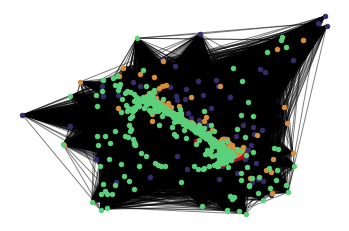

In [ ]:
# Visulalisation du nombre de communautés retrouvé pour abstract 

vect_label = set(partition_abstract.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_abstract.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_abstract) 
count = 0 
for com in set(partition_abstract.values()) : 
    list_nodes = [nodes for nodes in partition_abstract.keys() if partition_abstract[nodes] == com]        
    nx.draw_networkx_nodes(g_abstract, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_abstract, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 


In [ ]:
# Generation of graph algorithm For the title:

g_title = nx.from_numpy_matrix(Adj_Matrix_title)
partition_title = community.best_partition(g_title) 
print("partition", partition_title) 
# Calcul de la modularité liée à cette parition 
modularity_value = community.modularity(partition_title, g_title) 
print("modularity_value", modularity_value) 


partition {0: 0, 1: 1, 2: 2, 3: 0, 4: 0, 5: 3, 6: 2, 7: 0, 8: 4, 9: 0, 10: 4, 11: 3, 12: 2, 13: 0, 14: 5, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 2, 22: 2, 23: 5, 24: 0, 25: 4, 26: 5, 27: 2, 28: 4, 29: 1, 30: 2, 31: 4, 32: 6, 33: 0, 34: 1, 35: 2, 36: 2, 37: 0, 38: 0, 39: 2, 40: 2, 41: 2, 42: 0, 43: 0, 44: 3, 45: 2, 46: 0, 47: 0, 48: 1, 49: 2, 50: 0, 51: 5, 52: 0, 53: 0, 54: 4, 55: 0, 56: 5, 57: 0, 58: 4, 59: 0, 60: 2, 61: 3, 62: 5, 63: 2, 64: 2, 65: 4, 66: 2, 67: 2, 68: 2, 69: 1, 70: 0, 71: 2, 72: 5, 73: 4, 74: 4, 75: 0, 76: 0, 77: 0, 78: 4, 79: 4, 80: 3, 81: 0, 82: 2, 83: 2, 84: 2, 85: 6, 86: 2, 87: 2, 88: 0, 89: 0, 90: 4, 91: 0, 92: 6, 93: 1, 94: 0, 95: 5, 96: 5, 97: 2, 98: 0, 99: 1, 100: 4, 101: 0, 102: 0, 103: 3, 104: 0, 105: 0, 106: 5, 107: 2, 108: 0, 109: 1, 110: 0, 111: 1, 112: 2, 113: 0, 114: 0, 115: 1, 116: 4, 117: 0, 118: 5, 119: 5, 120: 0, 121: 0, 122: 2, 123: 0, 124: 4, 125: 2, 126: 0, 127: 0, 128: 2, 129: 2, 130: 2, 131: 2, 132: 4, 133: 2, 134: 0, 135: 1, 136: 5, 137

vect_label {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
size 10


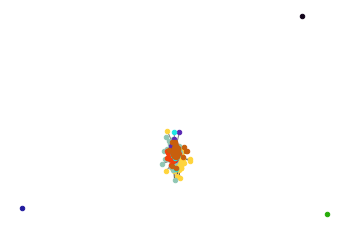

In [ ]:
# Visulalisation du nombre de communautés retrouvé pour Title
vect_label = set(partition_title.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_title.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_title) 
count = 0 
for com in set(partition_title.values()) : 
    list_nodes = [nodes for nodes in partition_title.keys() if partition_title[nodes] == com]        
    nx.draw_networkx_nodes(g_title, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_title, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

In [ ]:
#Generation of graph For the Authors:

g_author = nx.from_numpy_matrix(Adj_Matrix_Author)
partition_authors = community.best_partition(g_author) 
print("partition", partition_authors) 
# Calcul de la modularité liée à cette parition 
modularity_value = community.modularity(partition_authors, g_author) 
print("modularity_value", modularity_value) 


partition {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 12, 15: 12, 16: 1, 17: 13, 18: 13, 19: 14, 20: 15, 21: 16, 22: 17, 23: 0, 24: 12, 25: 4, 26: 18, 27: 19, 28: 4, 29: 20, 30: 4, 31: 21, 32: 22, 33: 0, 34: 12, 35: 23, 36: 0, 37: 24, 38: 0, 39: 25, 40: 0, 41: 0, 42: 26, 43: 0, 44: 27, 45: 0, 46: 0, 47: 27, 48: 0, 49: 27, 50: 12, 51: 27, 52: 27, 53: 28, 54: 29, 55: 30, 56: 31, 57: 0, 58: 32, 59: 0, 60: 0, 61: 33, 62: 34, 63: 35, 64: 28, 65: 35, 66: 36, 67: 28, 68: 7, 69: 15, 70: 15, 71: 15, 72: 15, 73: 4, 74: 37, 75: 37, 76: 37, 77: 37, 78: 7, 79: 12, 80: 12, 81: 13, 82: 4, 83: 4, 84: 38, 85: 38, 86: 39, 87: 39, 88: 12, 89: 0, 90: 12, 91: 34, 92: 12, 93: 12, 94: 40, 95: 12, 96: 15, 97: 41, 98: 42, 99: 43, 100: 12, 101: 0, 102: 12, 103: 44, 104: 45, 105: 44, 106: 45, 107: 46, 108: 47, 109: 48, 110: 47, 111: 49, 112: 4, 113: 50, 114: 4, 115: 12, 116: 51, 117: 12, 118: 13, 119: 42, 120: 34, 121: 12, 122: 28, 123: 12, 124: 12, 125: 52, 12

vect_label {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

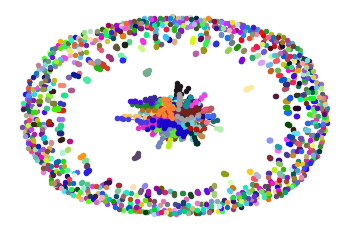

In [ ]:
# Visulalisation du nombre de communautés retrouvé pour authers
vect_label = set(partition_authors.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_authors.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_author) 
count = 0 
for com in set(partition_authors.values()) : 
    list_nodes = [nodes for nodes in partition_authors.keys() if partition_authors[nodes] == com]        
    nx.draw_networkx_nodes(g_author, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_author, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

In [ ]:
#Generation of graph For the Citations:

g_citation = nx.from_numpy_matrix(Adj_Matrix_Citations)
partition_citation = community.best_partition(g_citation) 
print("partition", partition_citation) 
# Calcul de la modularité liée à cette parition 
modularity_value = community.modularity(partition_citation, g_citation) 
print("modularity_value", modularity_value) 


partition {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 8, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 26, 33: 7, 34: 31, 35: 32, 36: 33, 37: 34, 38: 35, 39: 36, 40: 37, 41: 38, 42: 39, 43: 40, 44: 41, 45: 42, 46: 43, 47: 44, 48: 45, 49: 46, 50: 47, 51: 48, 52: 49, 53: 50, 54: 51, 55: 52, 56: 53, 57: 54, 58: 55, 59: 56, 60: 57, 61: 58, 62: 59, 63: 60, 64: 61, 65: 62, 66: 63, 67: 64, 68: 65, 69: 6, 70: 66, 71: 7, 72: 67, 73: 68, 74: 69, 75: 70, 76: 71, 77: 39, 78: 7, 79: 72, 80: 73, 81: 74, 82: 75, 83: 76, 84: 77, 85: 78, 86: 79, 87: 8, 88: 80, 89: 81, 90: 79, 91: 82, 92: 83, 93: 84, 94: 85, 95: 86, 96: 87, 97: 88, 98: 89, 99: 79, 100: 90, 101: 91, 102: 92, 103: 93, 104: 94, 105: 95, 106: 96, 107: 97, 108: 98, 109: 99, 110: 100, 111: 101, 112: 102, 113: 103, 114: 104, 115: 105, 116: 106, 117: 7, 118: 107, 119: 108, 120: 101, 121: 109, 122: 11

vect_label {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

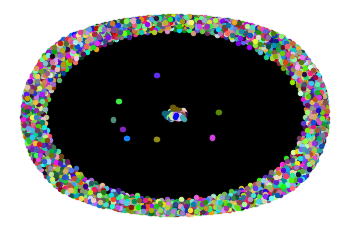

In [ ]:
# Visulalisation du nombre de communautés retrouvé pour Citations
vect_label = set(partition_citation.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_citation.values()))) 
print("size", size) 
# générer un vecteur de couleurs = au nombre de communautés 
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)] 
# Affichage du graphe 
pos = nx.spring_layout(g_citation) 
count = 0 
for com in set(partition_citation.values()) : 
    list_nodes = [nodes for nodes in partition_citation.keys() if partition_citation[nodes] == com]        
    nx.draw_networkx_nodes(g_author, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(g_author, pos, alpha=0.5) 
plt.axis("off") 
plt.show() 

In [ ]:
print("partition authors:", len(set(partition_authors.values()))) 
print("partition citations:", len(set(partition_citation.values()))) 
print("partition title:", len(set(partition_title.values())))
print("partition abstract:", len(set(partition_abstract.values()))) 




partition authors: 947
partition citations: 4200
partition title: 10
partition abstract: 4


In [ ]:
clustering_1 = list(partition_abstract.values())
clustering_2 = list(partition_title.values()) 
clustering_3 = list(partition_authors.values())
clustering_4 = list(partition_citation.values())
cluster_runs = np.array([clustering_1, clustering_2, clustering_3, clustering_4])
print("cluster_runs", cluster_runs) 
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 10) 
print("consensus_clustering_labels", consensus_clustering_labels)

cluster_runs [[   0    0    0 ...    3    3    2]
 [   0    1    2 ...    1    1    2]
 [   0    1    2 ...  945  674  946]
 [   0    1    2 ... 4197 4198 4199]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.10
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.46384099650624233.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 4383 vertices and 5161 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.10
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.1744220

In [ ]:
#Create the DataFrame that contain the result of the Clustering:
df_Result_Clustering = pd.DataFrame(data=np.array(consensus_clustering_labels),columns=['Cluster'])
df_Result_Clustering['id']=df.id

#Save the result in a csv file: 
df_Result_Clustering.to_csv('/home/Result_Clustering.csv',index=False)


In [ ]:
df_Result_Clustering.head()

,Cluster,id
0,3,594377
1,6,594378
2,4,594379
3,3,594381
4,3,594383


In [ ]:
#Create the consus matrix:

Matrix_consus = np.zeros((len(clustering_1),len(set(consensus_clustering_labels))))
for i in range(0,len(consensus_clustering_labels)):
  Matrix_consus[i][consensus_clustering_labels[i]]=1


Matrix_consus = Matrix_consus.transpose()

In [ ]:
#Create the result for the Abstract:
Matrix_Thematique_Abstract = np.dot(Matrix_consus, doc_words_Abstract)


In [ ]:
#Create the result for the Title:
Matrix_Thematique_Title = np.dot(Matrix_consus,doc_words_Title)


In [ ]:
#Create the result for the Authers
Matrix_Thematique_Authers = np.dot(Matrix_consus,doc_Authers)


In [ ]:
#Create the result for the citations:
Matrix_Thematique_citations = np.dot(Matrix_consus,Doc_Doc)
Matrix_Thematique_Abstract


array([[ 0.,  0., 20., ..., 13.,  8.,  3.],
       [ 0.,  0., 18., ..., 14.,  9.,  2.],
       [ 0.,  1., 18., ...,  9., 22.,  3.],
       ...,
       [12.,  7.,  7., ..., 17., 46., 25.],
       [ 6., 12.,  3., ..., 11., 42., 80.],
       [ 3., 11.,  5., ...,  2., 20., 14.]])